# 課程目標:
    
    利用神經網路的加法減法數學式來說明梯度下降

# 範例重點:
    
    透過網路參數(w, b)的更新可以更容易理解梯度下降的求值過程

matplotlib: 載入繪圖的工具包
random, numpy: 載入數學運算的工具包

In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
#適用於 Jupyter Notebook, 宣告直接在 cell 內印出執行結果
import random as random
import numpy as np
import csv

# ydata = b + w * xdata 
給定曲線的曲線範圍

In [32]:
# 給定初始的data
x_data = [ 338., 333., 328., 207., 226., 25., 179.,  60., 208.,  606.]
y_data = [ 640., 633., 619., 393., 428., 27., 193.,  66., 226., 1591.]

print(np.array(x_data)*2.67 - 184)

[ 718.46  705.11  691.76  368.69  419.42 -117.25  293.93  -23.8   371.36
 1434.02]


In [3]:
# 給定神經網路參數: bias 跟 weight
x = np.arange(-200,-100,1) # 給定 bias
y = np.arange(-5,5,0.1) # 給定 weight
print(len(x), x)
print(len(y), y)

100 [-200 -199 -198 -197 -196 -195 -194 -193 -192 -191 -190 -189 -188 -187
 -186 -185 -184 -183 -182 -181 -180 -179 -178 -177 -176 -175 -174 -173
 -172 -171 -170 -169 -168 -167 -166 -165 -164 -163 -162 -161 -160 -159
 -158 -157 -156 -155 -154 -153 -152 -151 -150 -149 -148 -147 -146 -145
 -144 -143 -142 -141 -140 -139 -138 -137 -136 -135 -134 -133 -132 -131
 -130 -129 -128 -127 -126 -125 -124 -123 -122 -121 -120 -119 -118 -117
 -116 -115 -114 -113 -112 -111 -110 -109 -108 -107 -106 -105 -104 -103
 -102 -101]
100 [-5.00000000e+00 -4.90000000e+00 -4.80000000e+00 -4.70000000e+00
 -4.60000000e+00 -4.50000000e+00 -4.40000000e+00 -4.30000000e+00
 -4.20000000e+00 -4.10000000e+00 -4.00000000e+00 -3.90000000e+00
 -3.80000000e+00 -3.70000000e+00 -3.60000000e+00 -3.50000000e+00
 -3.40000000e+00 -3.30000000e+00 -3.20000000e+00 -3.10000000e+00
 -3.00000000e+00 -2.90000000e+00 -2.80000000e+00 -2.70000000e+00
 -2.60000000e+00 -2.50000000e+00 -2.40000000e+00 -2.30000000e+00
 -2.20000000e+00 -2.10000000

In [4]:
# 這個 Z 是要幹嘛的？
Z =  np.zeros((len(x), len(y)))
print(Z.shape)
# meshgrid 返回的兩個矩陣X、Y必定是行數、列數相等的，且X、Y的行數都等
# meshgrid 函數用兩個坐標軸上的點在平面上畫格。
# ggX, ggY = np.meshgrid(x, y)
for i in range(len(x)):
    for j in range(len(y)):
        b = x[i]
        w = y[j]
        Z[j][i] = 0  
        for n in range(len(x_data)):
            delta_y = y_data[n] - b - w*x_data[n]
            Z[j][i] = Z[j][i] + delta_y**2
        Z[j][i] = Z[j][i]/len(x_data)
        
# 看起來 Z[j][i] 是用在最後面的等高圖要畫的。
# 以所有訓練資料計算的誤差的平均來表示某個 b, w 的 weight + bias 的誤差值
# 畫面畫圖的時候會當作“高度”來使用。

(100, 100)


In [14]:
# ydata = b + w * xdata 
b = -120 # initial b
w = -4 # initial w
lr = 0.000001 # learning rate
iteration = 100

# Store initial values for plotting.
b_history = [b]
w_history = [w]

#給定初始值
lr_b = 0.0
lr_w = 0.0

在微積分裡面，對多元函數的參數求∂偏導數，把求得的各個參數的偏導數以向量的形式寫出來，就是梯度。
比如函數f(x), 對x求偏導數，求得的梯度向量就是(∂f/∂x),簡稱grad f(x)或者▽f (x)。


In [27]:
'''
Loss = (實際 ydata – 預測 ydata)
Gradient = -2*input * Loss 
調整後的權重 = 原權重 – Learning * Gradient
'''
# Iterations
for i in range(iteration):
    
    b_grad = 0.0
    w_grad = 0.0
    for n in range(len(x_data)):        
        b_grad = b_grad - 2.0*(y_data[n] - b - w * x_data[n]) * 1.0
        w_grad = w_grad - 2.0*(y_data[n] - b - w * x_data[n]) * x_data[n]
        
    lr_b = lr_b + b_grad ** 2
    lr_w = lr_w + w_grad ** 2
    
    # Update parameters.
    b = b - lr * b_grad 
    w = w - lr * w_grad
    
    # Store parameters for plotting
    b_history.append(b)
    w_history.append(w)



In [29]:
print(b_history)

[-120, -119.967888, -119.99253665776, -119.97479472556101, -119.98871137202727, -119.97898442497153, -119.98691522923603, -119.9816586838363, -119.98625084869673, -119.98348769335861, -119.98621771122735, -119.98484525649283, -119.98653664940821, -119.98593986396223, -119.98705195602366, -119.98688780265323, -119.98767678448891, -119.98775393223798, -119.98836269562749, -119.98857442856745, -119.98908267221336, -119.98936946892827, -119.98982164523512, -119.99015030731682, -119.99057120986603, -119.99092322071361, -119.99132667826619, -119.99169171014024, -119.99208543576631, -119.99245772831148, -119.99284602401978, -119.99322236436514, -119.99360762962552, -119.99398622577404, -119.99436979890447, -119.99474965135965, -119.99513227881462, -119.99551283010165, -119.9958949282204, -119.9962758674045, -119.99665766840265, -119.99703882205826, -119.9974204554554, -119.99780172685341, -119.99818326488985, -119.99856460007908, -119.99894608304729, -119.99932745193618, -119.99970890230952, 

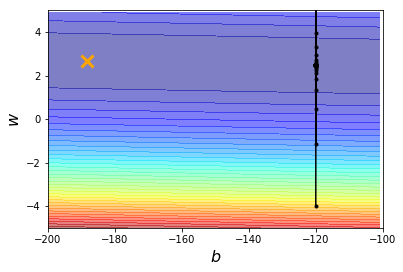

In [28]:
# plot the figure
plt.contourf(x, y, Z, 50, alpha=0.5, cmap=plt.get_cmap('jet'))
plt.plot([-188.4], [2.67], 'x', ms=12, markeredgewidth=3, color='orange')
plt.plot(b_history, w_history, 'o-', ms=3, lw=1.5, color='black')
plt.xlim(-200,-100)
plt.ylim(-5,5)
plt.xlabel(r'$b$', fontsize=16)
plt.ylabel(r'$w$', fontsize=16)
plt.show()